# Project 3

Florian Michael-Schwarzinger and Dieter Brehm - Project 3 - Fall 2018


In [117]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [118]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [119]:
# And an inition condition (with everything in SI units)
r_earth = 6.3781e6
epo = 190756

r_0 = (r_earth + epo) * m

init = State(x = r_0 * m,
             y = 0 * m,
             vx = 0 * m / s,
             vy = -7792 * m / s, )

,values
x,6568856.0 meter ** 2
y,0 meter
vx,0.0 meter / second
vy,-7792.0 meter / second


In [206]:
# Making a system object

r_earth = 6.371e6 * m

# m1 is the apollo 11 module
# m2 is the earth
system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=5.972e24 * kg,
                m2=13284 * kg,
                t_0=0 * s,
                t_end=100000 * s)

,values
init,x 6568856.0 meter ** 2 y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,5.972e+24 kilogram
m2,13284 kilogram
t_0,0 second
t_end,100000 second


In [207]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    pos = Vector(x, y)
    
    Fx, Fy = pol2cart(pos.angle, G * m1 * m2 / pos.mag **2) 
    
    force = Vector(Fx, Fy)
    
    return force

In [208]:
universal_gravitation(init, system)

<Quantity([122703.05769108      0.        ], 'newton / meter ** 2')>

In [209]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)

    acc_grav = universal_gravitation(state, system) / m2
    
    #print("runnin' code!, current position is x:", x, " y:", y)
    
    dydt = Vector(vx, vy)
    dvdt = -acc_grav
    
    return dydt.x, dydt.y, dvdt.x, dvdt.y

In [210]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-7792.0, 'meter / second')>,
 <Quantity(-9.236905878581915, 'newton / kilogram / meter ** 2')>,
 <Quantity(-0.0, 'newton / kilogram / meter ** 2')>)

In [211]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,16364
njev,0
nlu,0
status,-1
message,Required step size is less than spacing betwee...
success,False


In [212]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(59015.139143988206, 'second')>

In [213]:
# ... expressed in units we understand

t_final.to(UNITS.hour)

<Quantity(16.393094206663392, 'hour')>

In [218]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 1000)
results, details = run_ode_solver(system, slope_func, t_eval=ts)

In [215]:
# Scaling the time steps to days

#results.index /= 60 * 60 * 24
x = results.x
y = results.y;

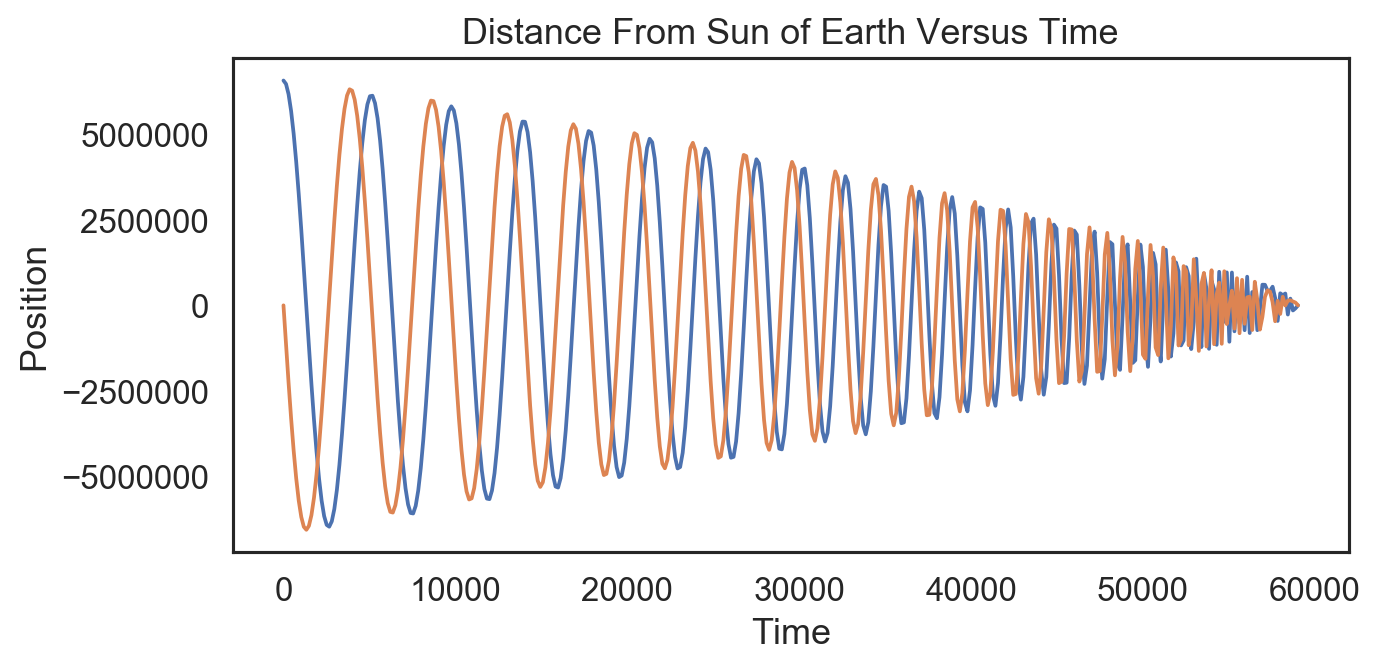

In [216]:
# And plotting

fig1 = plt.figure(figsize=(8, 8), dpi=180)
ax1 = fig1.add_subplot(211)
ax1.plot(x, label='x')
ax1.plot(y, label='y')
ax1.set_ylabel("Position")
ax1.set_xlabel("Time")
ax1.set_title("Distance From Sun of Earth Versus Time");

Text(0.5,1,'X and Y position of Apollo 11')

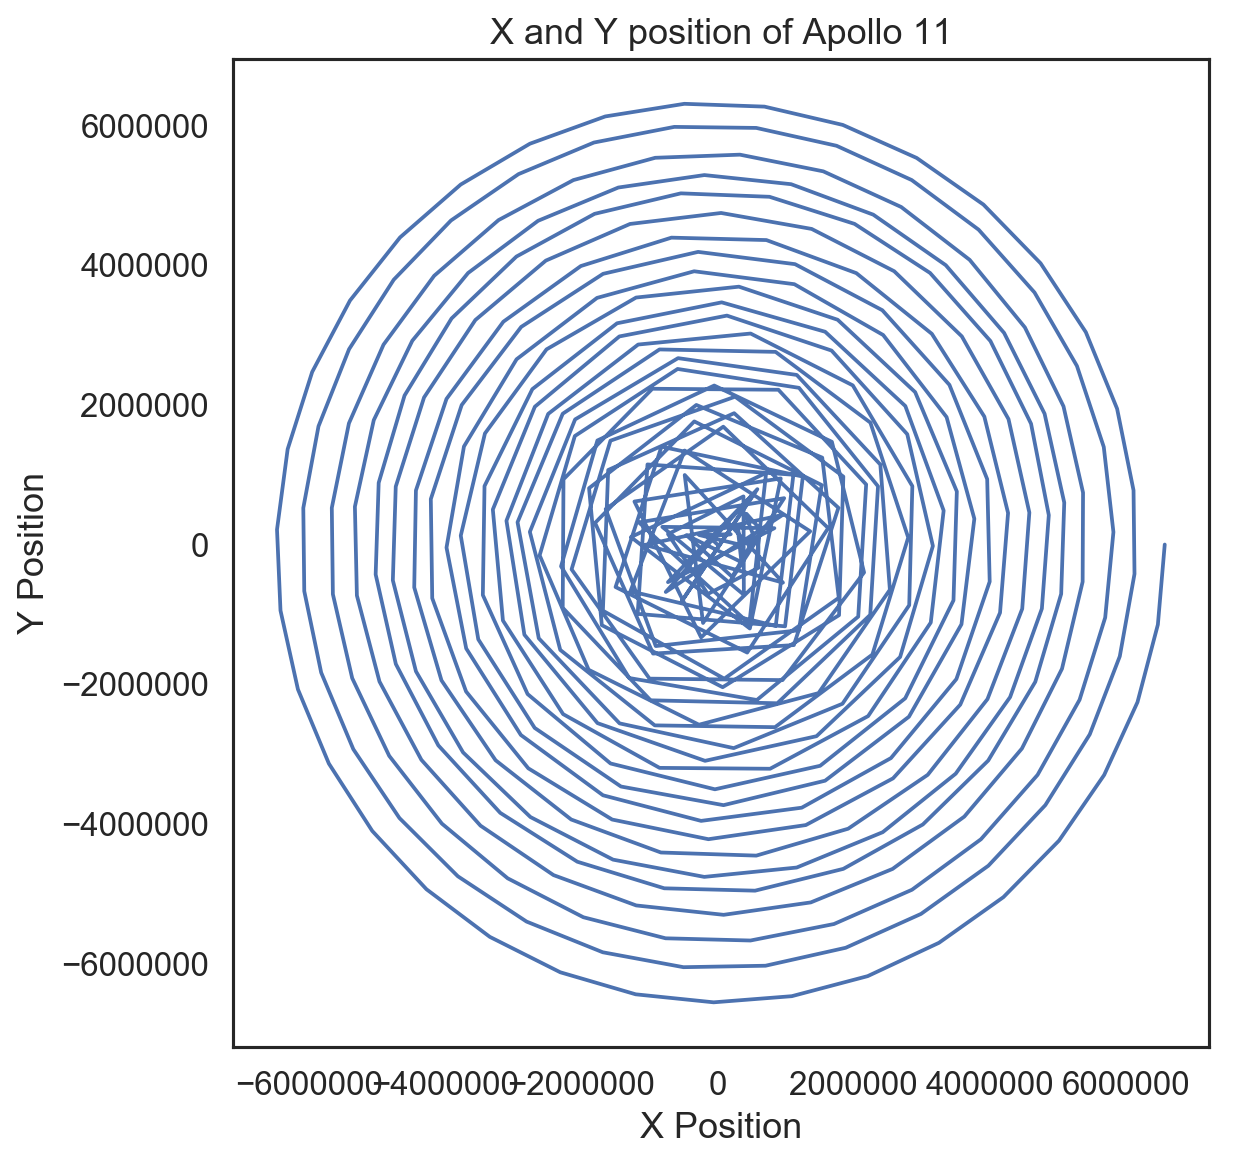

In [217]:
fig2 = plt.figure(figsize=(7, 16), dpi=180)
ax1 = fig2.add_subplot(211)
ax1.plot(x, y)
ax1.set_ylabel("Y Position")
ax1.set_xlabel("X Position")
ax1.set_title("X and Y position of Apollo 11")